# Homework 2

### Due by 11:59pm on 1 November ( submit within Portfolio )

For each instruction, show your code and execution within the Jupyter Notebook.

In [1]:
#Instruction1: import library and settings
import sys

sys.path

['',
 '/Users/wangpeiyu/anaconda3/envs/xyz/lib/python36.zip',
 '/Users/wangpeiyu/anaconda3/envs/xyz/lib/python3.6',
 '/Users/wangpeiyu/anaconda3/envs/xyz/lib/python3.6/lib-dynload',
 '/Users/wangpeiyu/anaconda3/envs/xyz/lib/python3.6/site-packages',
 '/Users/wangpeiyu/anaconda3/envs/xyz/lib/python3.6/site-packages/IPython/extensions',
 '/Users/wangpeiyu/.ipython']

In [2]:
%matplotlib inline
from collections import defaultdict
import json

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd

from matplotlib import rcParams
import matplotlib.cm as cm
import matplotlib as mpl

#colorbrewer2 Dark2 qualitative color table
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843)]

rcParams['figure.figsize'] = (10, 6)
rcParams['figure.dpi'] = 150
#rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'


def remove_border(axes=None, top=False, right=False, left=True, bottom=True):
    """
    Minimize chartjunk by stripping out unnecesasry plot borders and axis ticks
    
    The top/right/left/bottom keywords toggle whether the corresponding plot border is drawn
    """
    ax = axes or plt.gca()
    ax.spines['top'].set_visible(top)
    ax.spines['right'].set_visible(right)
    ax.spines['left'].set_visible(left)
    ax.spines['bottom'].set_visible(bottom)
    
    #turn off all ticks
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    
    #now re-enable visibles
    if top:
        ax.xaxis.tick_top()
    if bottom:
        ax.xaxis.tick_bottom()
    if left:
        ax.yaxis.tick_left()
    if right:
        ax.yaxis.tick_right()
        
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

#Instruction2: Describe your data set (see hint below):

1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

	a) radius (mean of distances from center to points on the perimeter)
	b) texture (standard deviation of gray-scale values)
	c) perimeter
	d) area
	e) smoothness (local variation in radius lengths)
	f) compactness (perimeter^2 / area - 1.0)
	g) concavity (severity of concave portions of the contour)
	h) concave points (number of concave portions of the contour)
	i) symmetry 
	j) fractal dimension ("coastline approximation" - 1)


In [3]:
#Instruction3: Import your dataset and print then number of rows and columns
import pandas as pd
df=pd.read_csv("data/wdbc.csv")
print("There are "+str(len(df))+" rows")
print("There are "+str(len(df.columns))+" columns")

There are 569 rows
There are 12 columns


In [4]:
#Instruction4: Print the names of the features/attributes of your dataset and show the head of the dataset
print(df.columns.values)

['ID_Number' 'Diagnosis' 'Radius' 'Texture' 'Perimeter' 'Area'
 'Smoothness' 'Compactness' 'Concavity' 'Comcave_Points' 'Symetry'
 'Fractal_dimensions']


In [5]:
df.head()

,ID_Number,Diagnosis,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,Comcave_Points,Symetry,Fractal_dimensions
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


/Users/wangpeiyu/anaconda3/envs/xyz/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


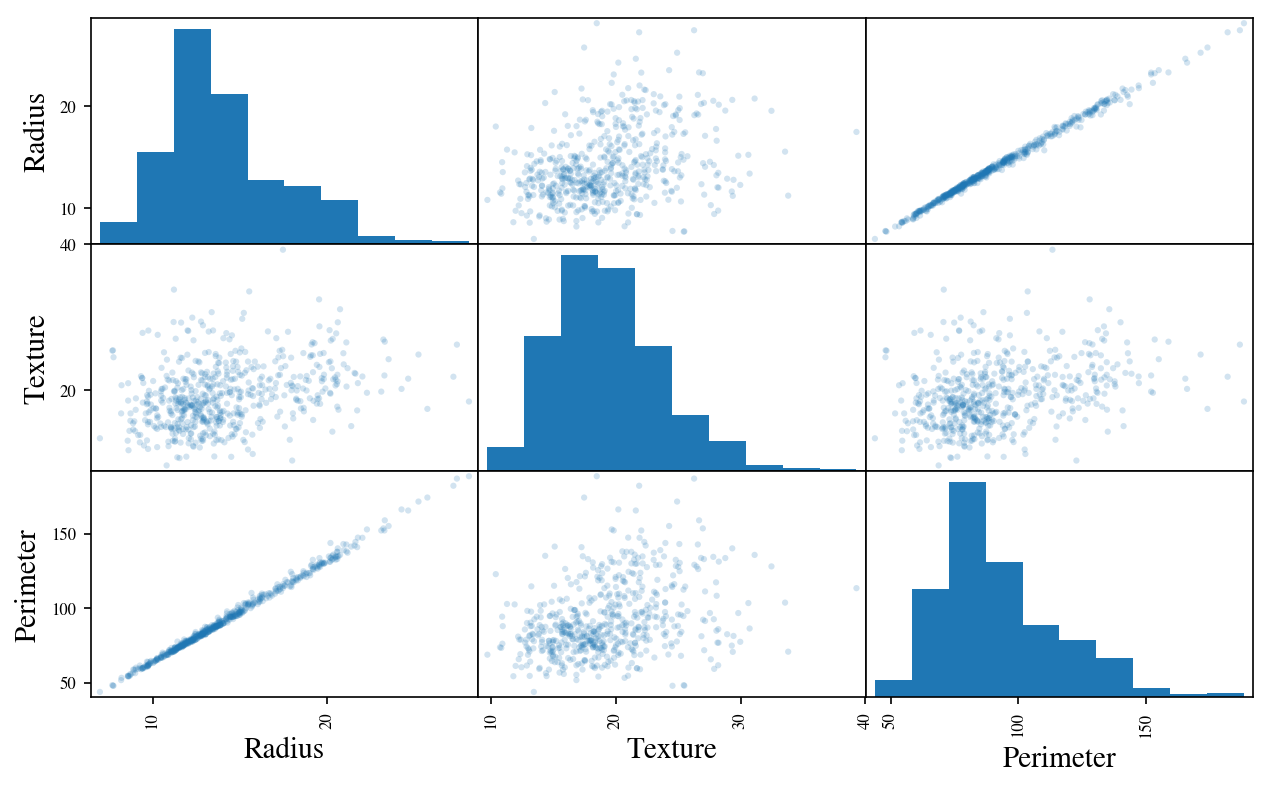

In [6]:
#Instruction5: Use a SPLOM to visualize some columns of this dataset. In Panda's the SPLOM is a one-liner.
import matplotlib.pyplot as plt
axes = pd.tools.plotting.scatter_matrix(df[['Radius','Texture','Perimeter']], alpha=0.2)
plt.show()


#plt.tight_layout()
#plt.savefig('scatter_matrix.png')



In [7]:
#Instruction6: Are there any strong correlation between any of the features.  Run a correlation analysis on the three 
#features.
df[['Radius','Texture','Perimeter']].corr()

,Radius,Texture,Perimeter
Radius,1.000000,0.323782,0.997855
Texture,0.323782,1.000000,0.329533
Perimeter,0.997855,0.329533,1.000000


In [8]:
#Instruction7: Carry out the regression, first standardizing our variables. This is strictly not necessary, but we are doing it as we wish to play around with PCA. 
#Since scikit-learn wants a n_sample rows times n_features matrix, we need to reshape the x variable. We store both an _vec variable, which is easier to plot with, 
#as well as the reshaped variable. 
from sklearn.linear_model import LinearRegression
X_HD=df[['Radius','Texture']].values
X_HDn=(X_HD-X_HD.mean(axis=0))/X_HD.std(axis=0)
radius_std_vec=X_HDn[:,0]
radius_std=radius_std_vec.reshape(-1,1)
texture_std_vec=X_HDn[:,1]
texture_std=texture_std_vec.reshape(-1,1)

In [9]:
#Instruction8: Split the data into a training set and a testing set. By default, 25% of the data is reserved for 
#testing. 
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(radius_std,texture_std_vec)

In [10]:
#Instrusction9: Use the training set for the fit, and find what our predictions ought to be on both the training and 
#test set.
clf1=LinearRegression()
clf1.fit(X_train,Y_train)
predicted_train=clf1.predict(X_train)
predicted_test=clf1.predict(X_test)
trains=X_train.reshape(1,-1).flatten()
print(clf1.coef_,clf1.intercept_)

[0.34110234] 0.008115269073025143


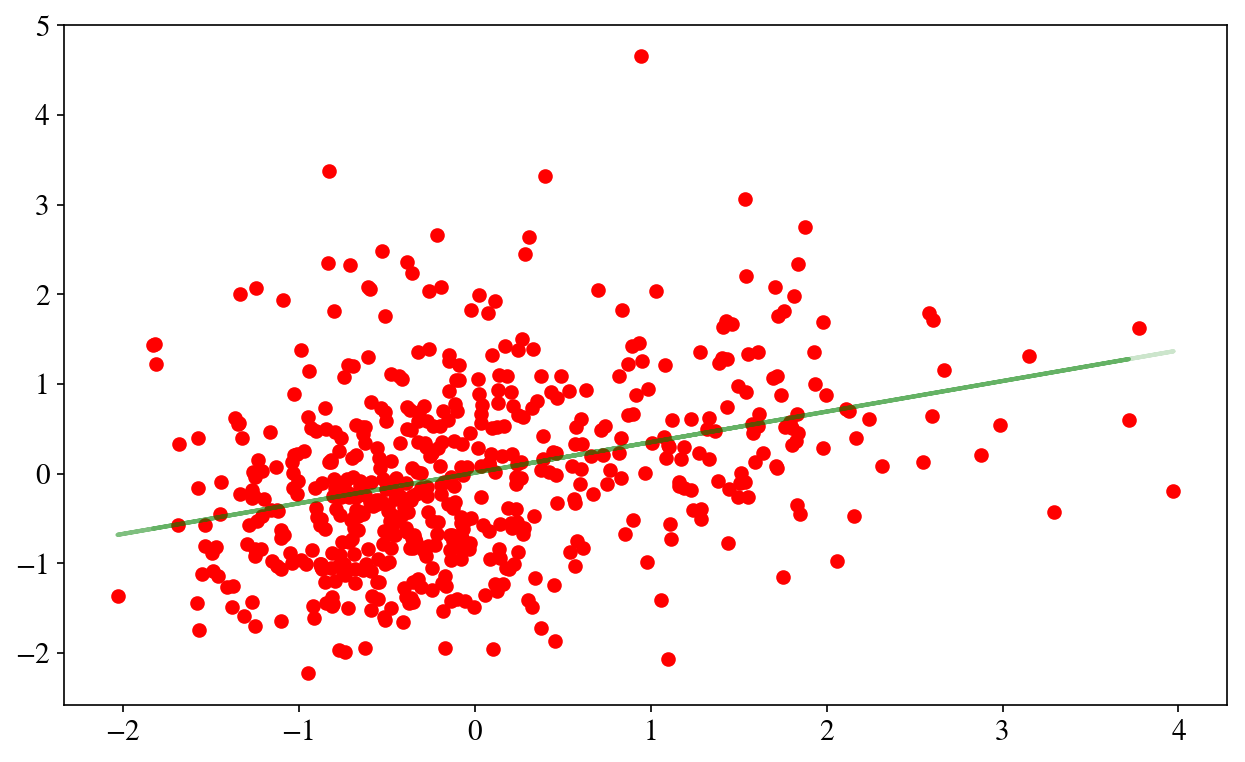

In [11]:
#Instruction10: Plot the scatter against the fit for both training and test data.
plt.scatter(radius_std,texture_std_vec,c='r')
plt.plot(X_train,predicted_train,c='g',alpha=0.5)
plt.plot(X_test,predicted_test,c='g',alpha=0.2)

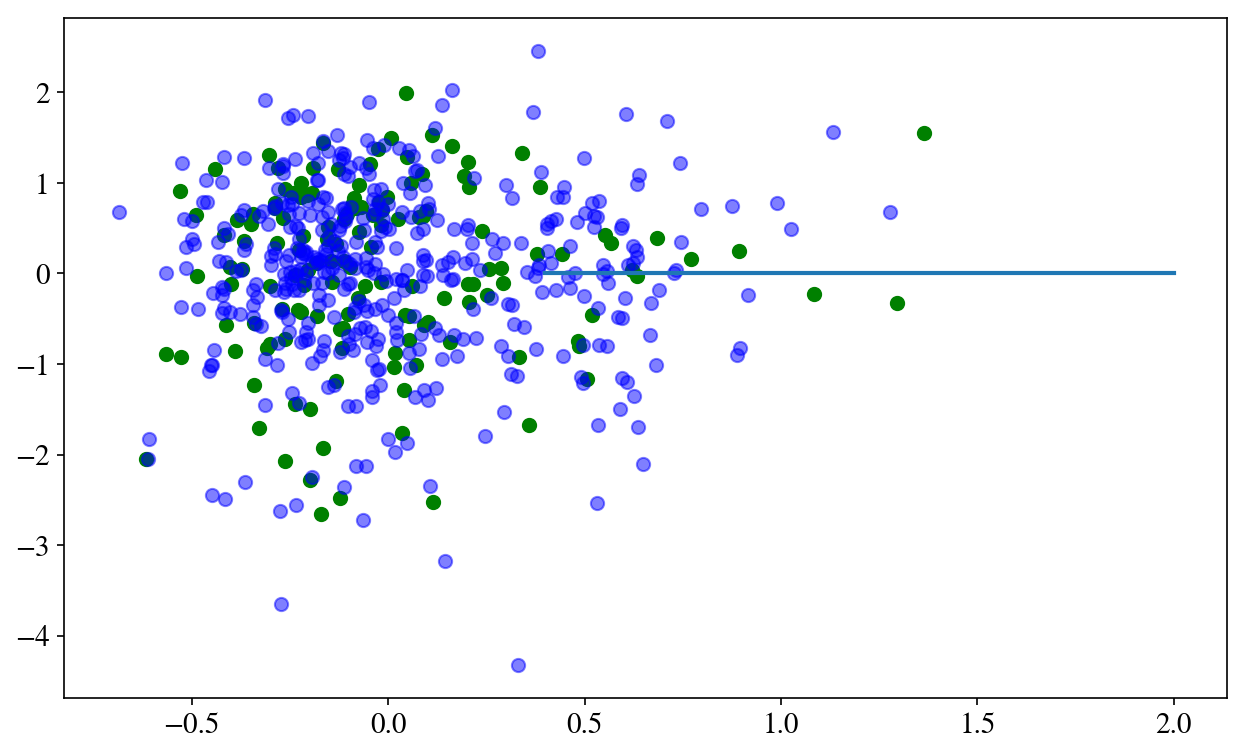

In [12]:
#Instruction11: Look at the residuals, again on both sets.
plt.scatter(predicted_test, predicted_test-Y_test,c='g',s=40)
plt.scatter(predicted_train,predicted_train-Y_train,c='b',s=40,alpha=0.5)
plt.plot([0.4,2],[0,0])

In [13]:
#Instruction12: Take the standarddized data and do a 2-D PCA on it. 
#Here we do not seek to accomplish a dimensional reduction, but to understand the variance structure of the data.
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
x=pca.fit_transform(X_HDn)
print(pca.explained_variance_ratio_)

[0.66189095 0.33810905]


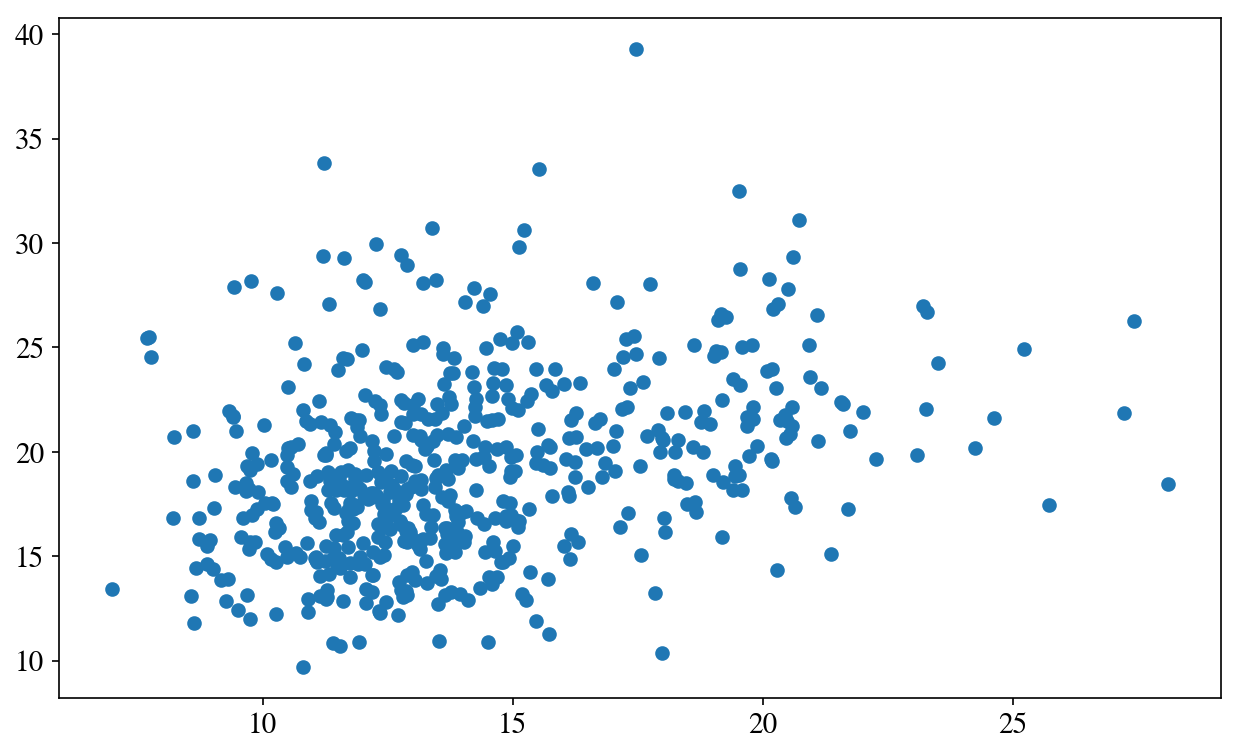

In [14]:
plt.scatter(X_HD[:,0],X_HD[:,1])

In [15]:
#Instruction13: Reconstruct the original data from only the first component, setting the others to 0.
pca1=PCA(n_components=1) #only keep one dimension
X_E=pca1.fit_transform(X_HDn)
X_reconstructed=pca1.inverse_transform(X_E)

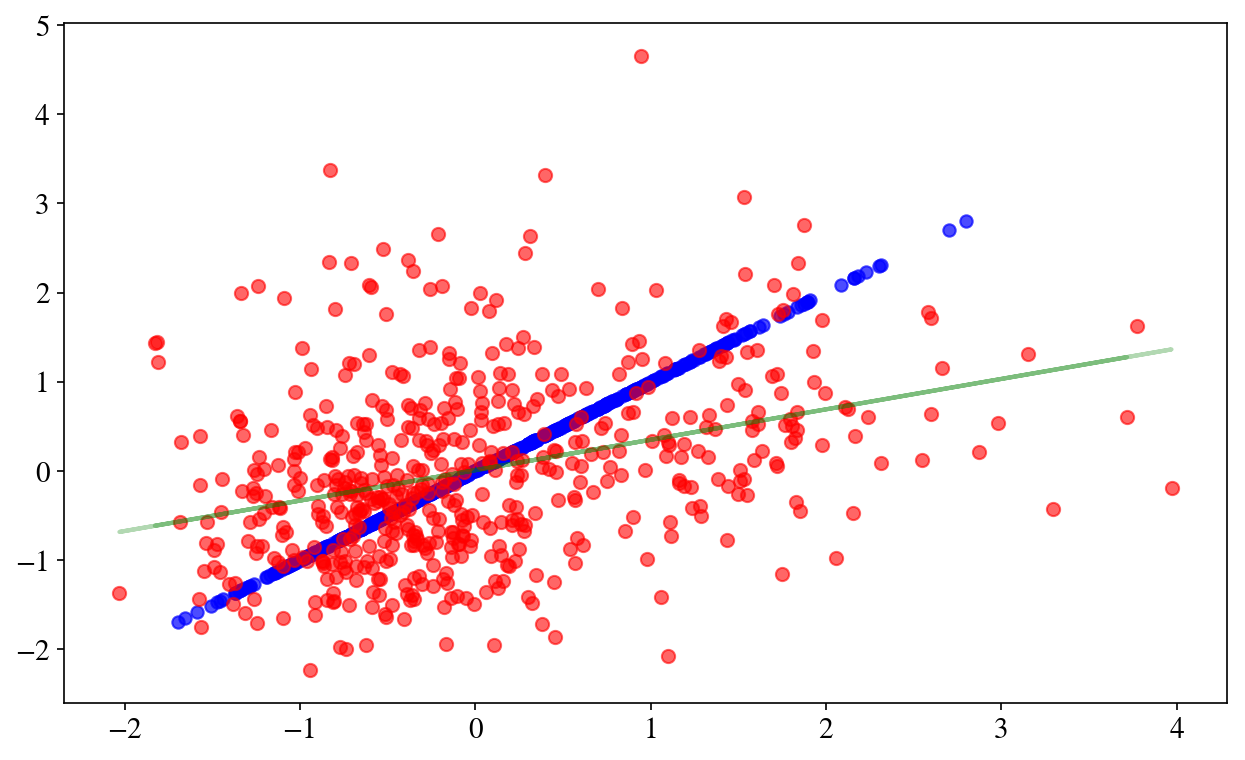

In [16]:
#Instruction14: Plot the reconstructed education(x) and income(y) from the first principal component, in blue.
plt.scatter(X_reconstructed[:,0],X_reconstructed[:,1],c='b',s=35,alpha=0.7)
plt.scatter(radius_std,texture_std_vec,s=40,c='r',alpha=0.6)
plt.plot(X_train,predicted_train,c='g',alpha=0.3)
plt.plot(X_test,predicted_test,c='g',alpha=0.3)

In [ ]:
#Part2: Logistic Regression Instuctions

In [17]:
#Instruction1: Load the array
data=np.array([[ 66.,   0.],
       [ 70.,   1.],
       [ 69.,   0.],
       [ 68.,   0.],
       [ 67.,   0.],
       [ 72.,   0.],
       [ 73.,   0.],
       [ 70.,   0.],
       [ 57.,   1.],
       [ 63.,   1.],
       [ 70.,   1.],
       [ 78.,   0.],
       [ 67.,   0.],
       [ 53.,   1.],
       [ 67.,   0.],
       [ 75.,   0.],
       [ 70.,   0.],
       [ 81.,   0.],
       [ 76.,   0.],
       [ 79.,   0.],
       [ 75.,   1.],
       [ 76.,   0.],
       [ 58.,   1.]])

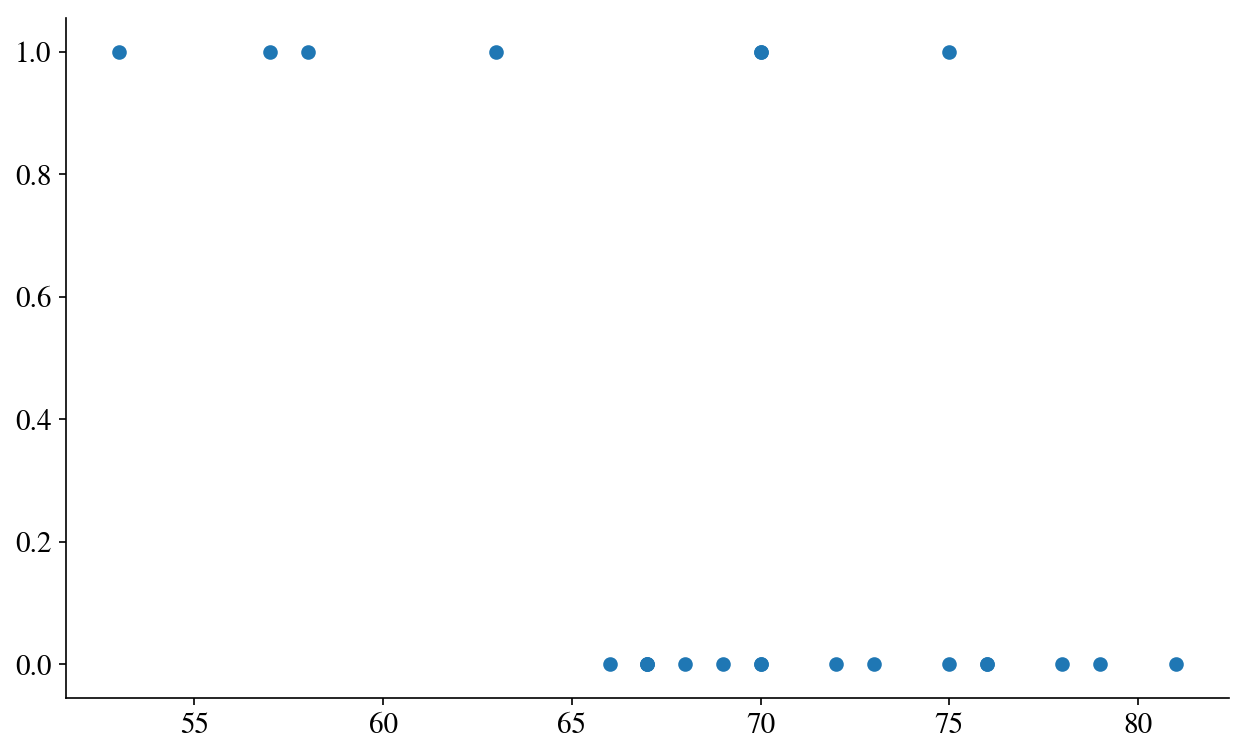

In [18]:
#Instruction2: Plot the array.
temps,pfail=data[:,0],data[:,1]
plt.scatter(temps,pfail)
axes=plt.gca()
axes.grid(False)
remove_border(axes)

In [19]:
#Instruction3: Run Logistic Regression with sklearn.linear_model and set c to 1000.
from sklearn.linear_model import LogisticRegression
reg=1000.
clf4=LogisticRegression(C=reg)
clf4.fit(temps.reshape(-1,1),pfail)

/Users/wangpeiyu/anaconda3/envs/xyz/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [20]:
#Instruction4: Make predictions, get the associated probabilities, and plot them.
tempsnew=np.linspace(20.,90.,15)
probs=clf4.predict_proba(tempsnew.reshape(-1,1))[:,1]
predicts=clf4.predict(tempsnew.reshape(-1,1))

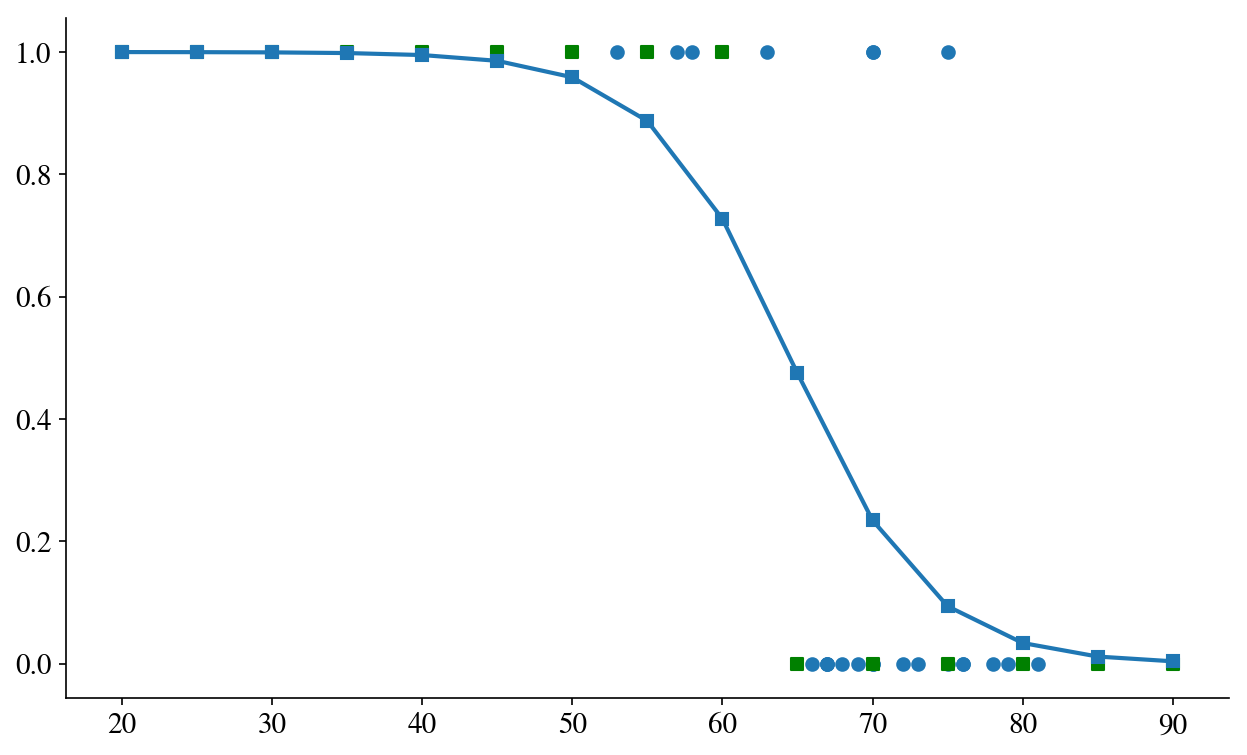

In [21]:
plt.scatter(temps,pfail)
axes=plt.gca()
axes.grid(False)
remove_border(axes)
plt.plot(tempsnew,probs,marker='s')
plt.scatter(tempsnew,predicts,marker='s',color='green')

In [22]:
#Instruction5: use pandas crosstab to write a table of prediction vs failure on the "training" set.
pd.crosstab(pfail,clf4.predict(temps.reshape(-1,1)),rownames=["Actual"],colnames=["Predicted"])


Predicted,0.0,1.0
Actual,,
0.0,16,0
1.0,3,4


In [76]:
#Part3: Bias and Variance and Cross Validation


SyntaxError: invalid syntax (<ipython-input-76-d02808537475>, line 2)

In [31]:
# Instruction1: Load the settings needed for part3

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#import brewer2mpl
from matplotlib import rcParams

#colorbrewer2 Dark2 qualitative color table
#dark2_cmap = brewer2mpl.get_map('Dark2', 'Qualitative', 7)
#dark2_colors = dark2_cmap.mpl_colors

rcParams['figure.figsize'] = (10, 6)
rcParams['figure.dpi'] = 150
#rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'


def remove_border(axes=None, top=False, right=False, left=True, bottom=True):
    """
    Minimize chartjunk by stripping out unnecesasry plot borders and axis ticks
    
    The top/right/left/bottom keywords toggle whether the corresponding plot border is drawn
    """
    ax = axes or plt.gca()
    ax.spines['top'].set_visible(top)
    ax.spines['right'].set_visible(right)
    ax.spines['left'].set_visible(left)
    ax.spines['bottom'].set_visible(bottom)
    
    #turn off all ticks
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    
    #now re-enable visibles
    if top:
        ax.xaxis.tick_top()
    if bottom:
        ax.xaxis.tick_bottom()
    if left:
        ax.yaxis.tick_left()
    if right:
        ax.yaxis.tick_right()
        
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
import warnings
warnings.filterwarnings('ignore', message='Polyfit*')

In [32]:
import random
import copy
def scatter_by(df, scatterx, scattery, by=None, figure=None, axes=None, labeler={}, mfunc=None, setupfunc=None, mms=8):
    cs=copy.deepcopy(colorscale.mpl_colors)
    if not figure:
        figure=plt.figure(figsize=(8,8))
    if not axes:
        axes=figure.gca()
    x=df[scatterx]
    y=df[scattery]
    if not by:
        col=random.choice(cs)
        axes.scatter(x, y, cmap=colorscale, c=col)
        if setupfunc:
            axeslist=setupfunc(axes, figure)
        else:
            axeslist=[axes]
        if mfunc:
            mfunc(axeslist,x,y,color=col, mms=mms)
    else:
        cs=list(np.linspace(0,1,len(df.groupby(by))))
        xlimsd={}
        ylimsd={}
        xs={}
        ys={}
        cold={}
        for k,g in df.groupby(by):
            col=cs.pop()
            x=g[scatterx]
            y=g[scattery]
            xs[k]=x
            ys[k]=y
            c=colorscale.mpl_colormap(col)
            cold[k]=c
            axes.scatter(x, y, c=c, label=labeler.get(k,k), s=40, alpha=0.3);
            xlimsd[k]=axes.get_xlim()
            ylimsd[k]=axes.get_ylim()
        xlims=[min([xlimsd[k][0] for k in xlimsd.keys()]), max([xlimsd[k][1] for k in xlimsd.keys()])]
        ylims=[min([ylimsd[k][0] for k in ylimsd.keys()]), max([ylimsd[k][1] for k in ylimsd.keys()])]
        axes.set_xlim(xlims)
        axes.set_ylim(ylims)
        if setupfunc:
            axeslist=setupfunc(axes, figure)
        else:
            axeslist=[axes]
        if mfunc:
            for k in xs.keys():
                mfunc(axeslist,xs[k],ys[k],color=cold[k], mms=mms);
    axes.set_xlabel(scatterx);
    axes.set_ylabel(scattery);
    
    return axes

def make_rug(axeslist, x, y, color='b', mms=8):
    axes=axeslist[0]
    zerosx1=np.zeros(len(x))
    zerosx2=np.zeros(len(x))
    xlims=axes.get_xlim()
    ylims=axes.get_ylim()
    zerosx1.fill(ylims[1])
    zerosx2.fill(xlims[1])
    axes.plot(x, zerosx1, marker='|', color=color, ms=mms)
    axes.plot(zerosx2, y, marker='_', color=color, ms=mms)
    axes.set_xlim(xlims)
    axes.set_ylim(ylims)
    return axes

In [33]:
#Instruction2: Load your dataset

import pandas as pd
df=pd.read_csv("data/wdbc.csv")
print(len(df.columns))
print(len(df.index))

12
569


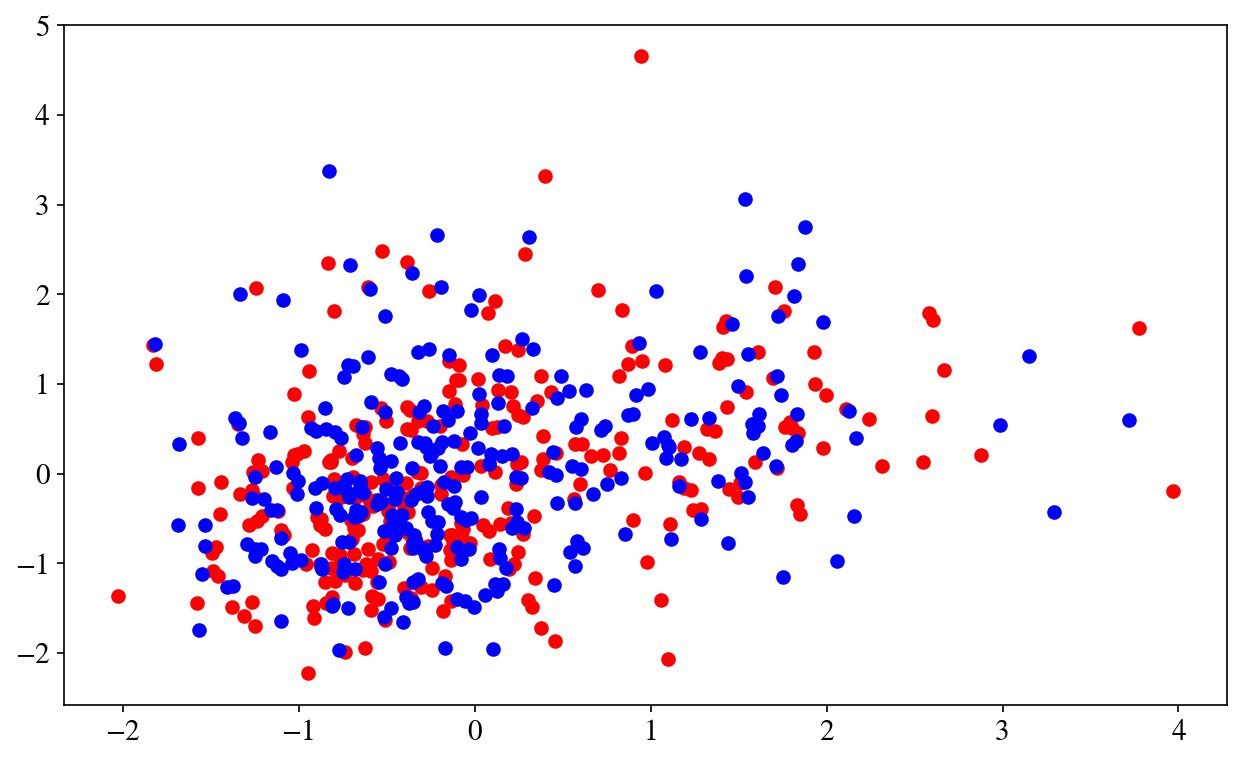

In [65]:
#Instruction3: Split the data set into equal parts test and training using the std vectors from Part1
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(radius_std, texture_std, test_size=0.5)

plt.scatter(X_train,Y_train,c='r')
plt.scatter(X_test,Y_test,c='b')


In [66]:
#Instruction4: Create a column called "class" and randomly add a "1", "2", or "3" for every row.
#e.g.
#featueA | Class
#--- | ---
#9 | 1
#5 | 2
#7 | 3
#6 | 2
#3 | 1
#6 | 3

df['randNumCol'] = np.random.randint(1, 4, df.shape[0])
print(df.columns)

Index(['ID_Number', 'Diagnosis', 'Radius', 'Texture', 'Perimeter', 'Area', 'Smoothness', 'Compactness', 'Concavity', 'Comcave_Points', 'Symetry', 'Fractal_dimensions', 'randNumCol'], dtype='object')


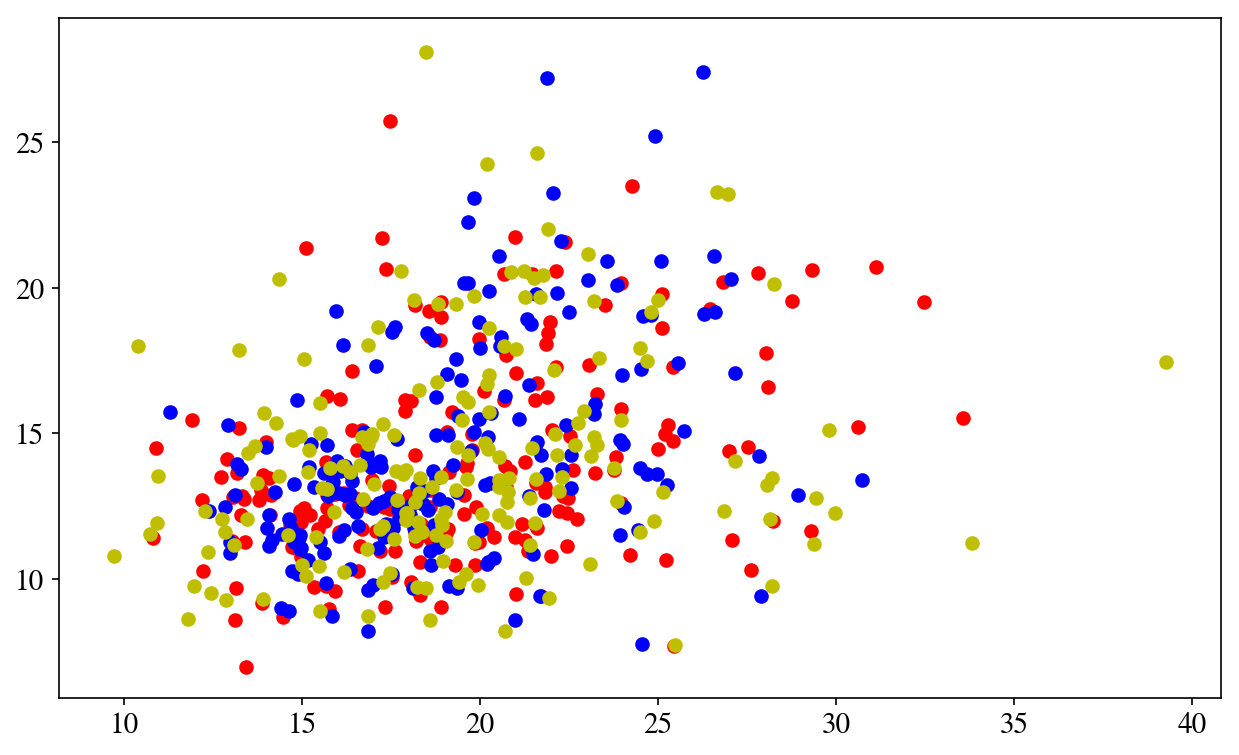

In [67]:
#Instruction5: Choose three different features in your dataset and cluster them by the randomNumCol
plt.scatter(df[['Texture']].query("@df.randNumCol==1"),df[['Radius']].query("@df.randNumCol==1"),c='r')
plt.scatter(df[['Texture']].query("@df.randNumCol==2"),df[['Radius']].query("@df.randNumCol==2"),c='b')
plt.scatter(df[['Texture']].query("@df.randNumCol==3"),df[['Radius']].query("@df.randNumCol==3"),c='y')



In [68]:
#Instructin6: Add plotting settings
from matplotlib.colors import ListedColormap
#cm_bright = ListedColormap(['#FF0000', '#000000','#0000FF'])
#cm = plt.cm.RdBu
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

def points_plot(X, Xtr, Xte, ytr, yte, clf, colorscale=cmap_light, cdiscrete=cmap_bold):
    h = .02
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50),
                         np.linspace(y_min, y_max, 50))

    plt.figure()
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light, alpha=0.2)
    plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr-1, cmap=cdiscrete, s=50, alpha=0.2,edgecolor="k")
    # and testing points
    yact=clf.predict(Xte)
    print ("SCORE"), clf.score(Xte, yte)
    plt.scatter(Xte[:, 0], Xte[:, 1], c=yte-1, cmap=cdiscrete, alpha=0.5, marker="s", s=35)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    return ax

In [92]:
#Instruction7: Develop a kNN with 20 neighbors
from sklearn.preprocessing import StandardScaler  
from sklearn.neighbors import KNeighborsClassifier
smaller_df=df[['Radius','Texture']]
scaler = StandardScaler()  
scaler.fit(smaller_df)
smaller_df = scaler.transform(smaller_df)  

classifier = KNeighborsClassifier(n_neighbors=20)  
classifier.fit(smaller_df, df[['randNumCol']])  

/Users/wangpeiyu/anaconda3/envs/xyz/lib/python3.6/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=20, p=2,
           weights='uniform')

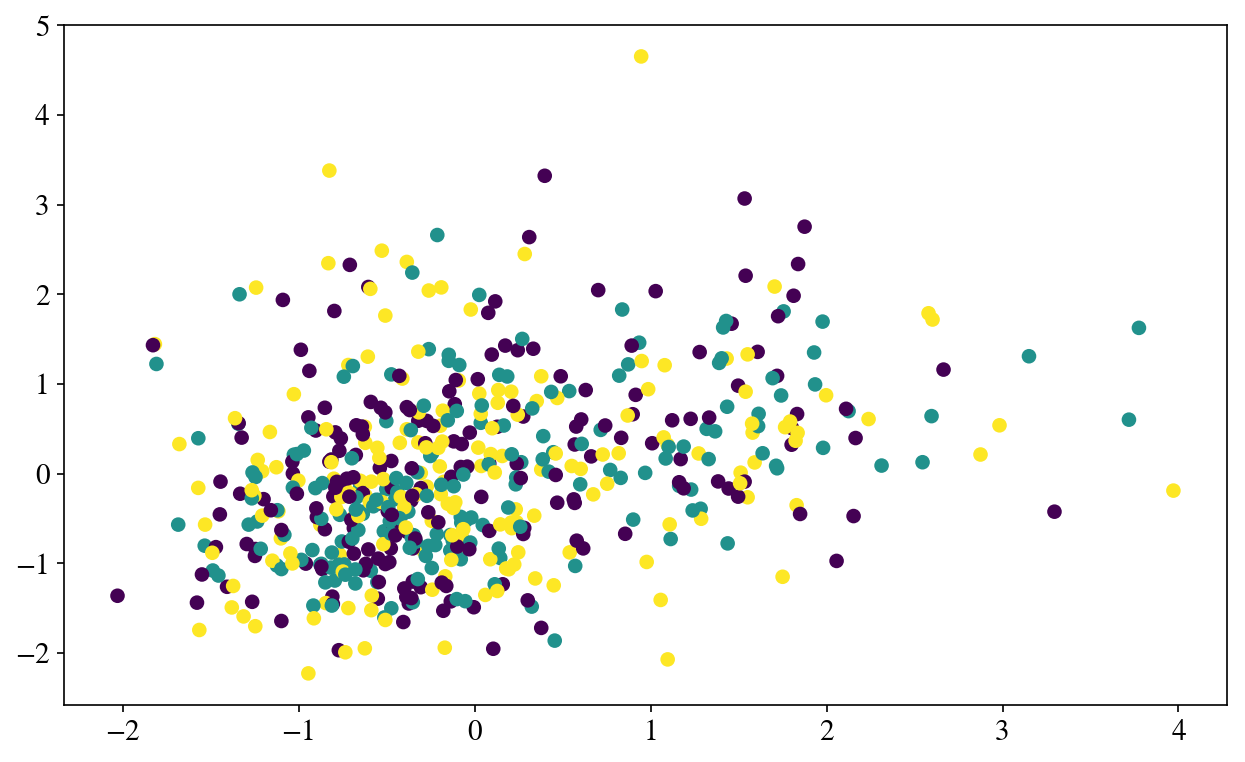

In [96]:
#Instruction8: Plot the kNN model with 20 neighbors
#dir(classifier)
plt.scatter(classifier._fit_X[:,0],classifier._fit_X[:,1],c=classifier._y)

/Users/wangpeiyu/anaconda3/envs/xyz/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


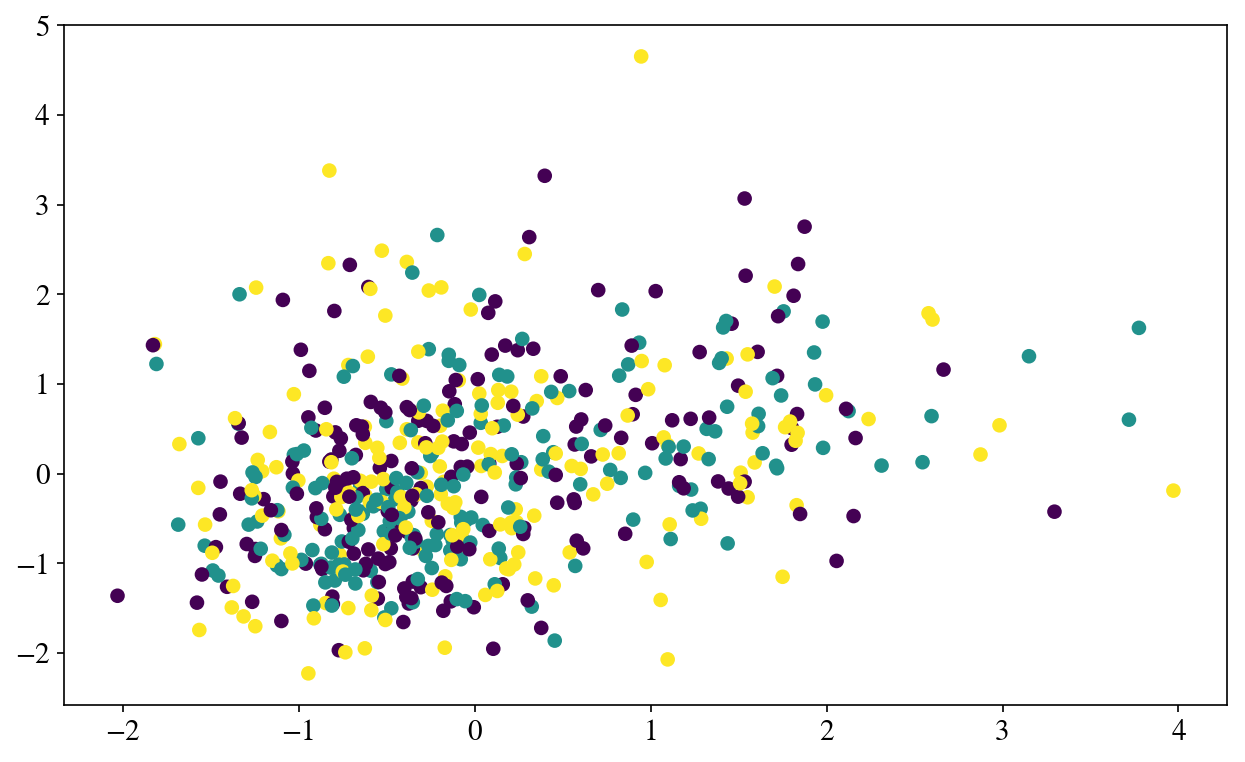

In [97]:
##Instruction9: Plot the kNN model with 1 neighbors
classifier = KNeighborsClassifier(n_neighbors=1)  
classifier.fit(smaller_df, df[['randNumCol']])  
plt.scatter(classifier._fit_X[:,0],classifier._fit_X[:,1],c=classifier._y)

/Users/wangpeiyu/anaconda3/envs/xyz/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


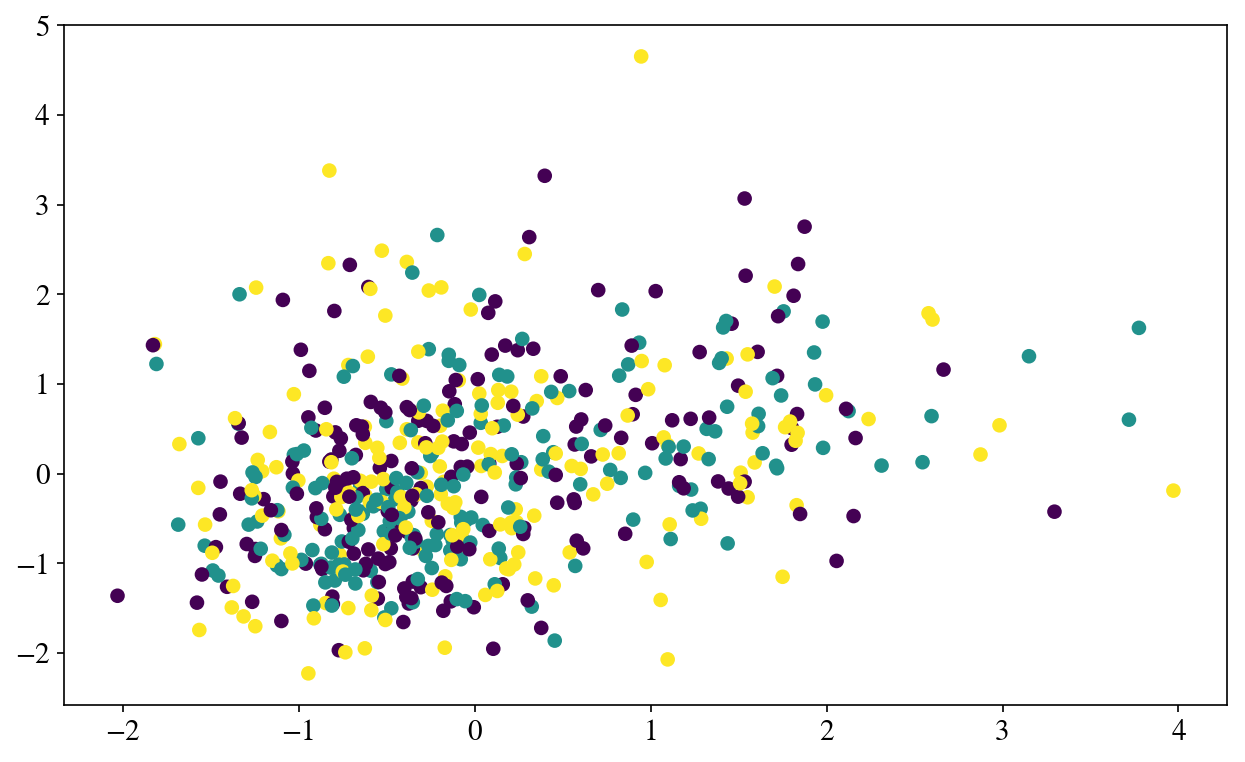

In [98]:
##Instruction10: Plot the kNN model with 35 neighbors
classifier = KNeighborsClassifier(n_neighbors=35)  
classifier.fit(smaller_df, df[['randNumCol']])  
plt.scatter(classifier._fit_X[:,0],classifier._fit_X[:,1],c=classifier._y)